# Bank Marketing - Subscription Prediction

### Marketing
The action or business of promoting and selling products or services, including market research and advertising.

### Term deposit
Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.

## Data Set information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset bank-additional-full.csv contains all examples (45211) with 17 features, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### Attribute information
#### Input Variables
##### Bank Client Data
**age:** (numeric)  
**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
**education:** (categorical: primary, secondary, tertiary and unknown)  
**default:** has credit in default? (categorical: 'no','yes')  
**balance:** average yearly balance, in euros (numeric)   
**housing:** has housing loan? (categorical: 'no','yes')  
**loan:** has personal loan? (categorical: 'no','yes')  
##### Related with the last contact of the current campaign:
**contact:** contact communication type (categorical: 'cellular','telephone')  
**day:** last contact day of the month (numeric)  
**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
##### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  
**previous:** number of contacts performed before this campaign and for this client (numeric)  
**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Output variable (desired target):
**y:** has the client subscribed a term deposit? (binary: 'yes','no')

**Note:** It is mentioned in the Data Set information that thee are no missing values, but still we will run some test forr the same.

## Data Exploration
### import pandas and numpy for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import time

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')
%matplotlib inline 

# df = pd.read_csv('bank/bank.csv')
df = pd.read_csv('bank/bank-full.csv')
print('Total samples: ', len(df))
# df = df.sample(20000)
# print('Chosen samples: 20000')

Total samples:  45211


### Missing Data

In [2]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values.

### Overview of available data

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Adding a new column by name 'subscribed' to store the value '1' if subscribed, else '0' 
df['subscribed'] = (df.y == 'yes').astype('int')
df.drop('y', axis=1, inplace=True)

In [5]:
# sns.pairplot(df, hue='subscribed')

#### Quick Observations on Numerical Data
- Total available data count is 45211 entries  
- Mean Age of the contacted customers is 41 years (Approx)  
- Mininmum Age of the contacted customers is 18 years
- Maximum Age of the contacted customers is 95 years
- Mean of call durationss is 258 seconds  
- Mean account balance for the customers 1362 euros  
- More than 75% of the the values in the column 'pdays' are set to -1. We know from our attribute informations that -1 means client was not previously contacted
- Just similar to the last observation more than 75% of the values inside the columns 'previous' which indicates how many times the customer was contacted before this campaign is 0 i. e. the customer is being contactedd forr the very first time.
- The values '-1' and '0' of the columns 'pdays' and 'previous' respectively are actually pointing towards the same fact.
- Because of the significant redundency of '0' and '-1' in their respective columns We might drop them later if their fluctuations do not show any relation with the outcome i. e. column 'y'.

In [6]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


#### Quick Observation on Categorical Data
- Out of 45211, more than 44000 i. e. 97.3% customers do not have a credit. The number of customers with credit are negligible when compared to it. We might drop this column later.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [8]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [9]:
df.shape

(45211, 17)

In [10]:
df.groupby('subscribed').size()

subscribed
0    39922
1     5289
dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

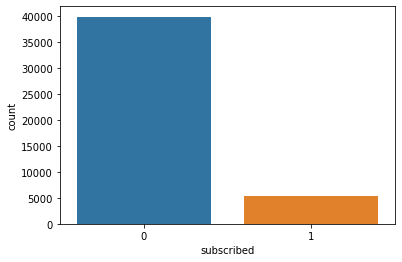

In [11]:
sns.countplot(x=df['subscribed'], data=df)

**Quick Observation** 
- 5289 Out of 45211 contacted customers subscribed

In [12]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
# By calculating the prevalance we are checking that out of total customers how many customer have actually suscribed 
def calculate_prevalance(subscribed):
    total_customers = len(df)
    positive_prevalance = sum(subscribed)/total_customers
    positive_prevalance = round(positive_prevalance, 3)
    print(f"The positive prevalnce is: {positive_prevalance}")
    
calculate_prevalance(df['subscribed'].values)

The positive prevalnce is: 0.117


### Exploring unique values
- Checking if there are any unnecessary columns
- Finding categorical varieties

In [14]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,balance,housing,loan,contact,day
0,58,management,married,tertiary,no,2143,yes,no,unknown,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5


In [15]:
df[list(df.columns)[10:]].head()

,month,duration,campaign,pdays,previous,poutcome,subscribed
0,may,261,1,-1,0,unknown,0
1,may,151,1,-1,0,unknown,0
2,may,76,1,-1,0,unknown,0
3,may,92,1,-1,0,unknown,0
4,may,198,1,-1,0,unknown,0


In [16]:
df.shape

(45211, 17)

In [17]:
# check unique values for every column
for feature in df.columns:
    print(f'{feature} : {df[feature].nunique()} unique values')

age : 77 unique values
job : 12 unique values
marital : 3 unique values
education : 4 unique values
default : 2 unique values
balance : 7168 unique values
housing : 2 unique values
loan : 2 unique values
contact : 3 unique values
day : 31 unique values
month : 12 unique values
duration : 1573 unique values
campaign : 48 unique values
pdays : 559 unique values
previous : 41 unique values
poutcome : 4 unique values
subscribed : 2 unique values


In [18]:
# for every column
for feature in df.columns:
    number_of_unique_values = df[feature].nunique()
    if number_of_unique_values < 30:
        print(f'{feature} : {number_of_unique_values}\n{df[feature].unique()}')

job : 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : 3
['married' 'single' 'divorced']
education : 4
['tertiary' 'secondary' 'unknown' 'primary']
default : 2
['no' 'yes']
housing : 2
['yes' 'no']
loan : 2
['no' 'yes']
contact : 3
['unknown' 'cellular' 'telephone']
month : 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : 4
['unknown' 'failure' 'other' 'success']
subscribed : 2
[0 1]


### Numerical Features

In [19]:
numerical_data = [data for data in df.dtypes[df.dtypes == 'int64'].index]
numerical_data

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
df[numerical_data].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [21]:
df[numerical_data].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


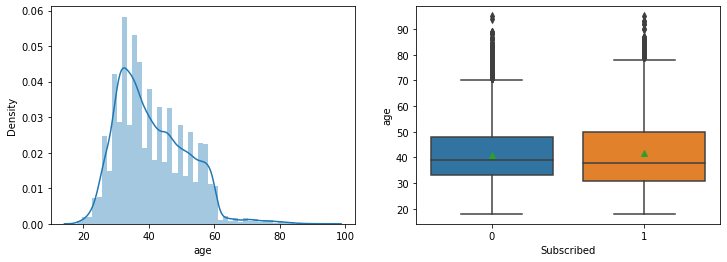

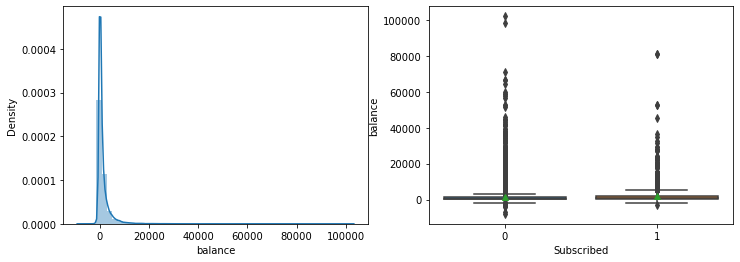

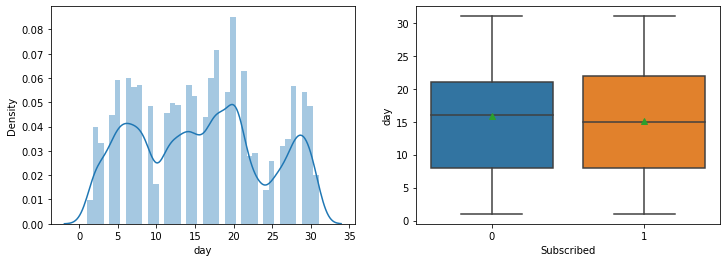

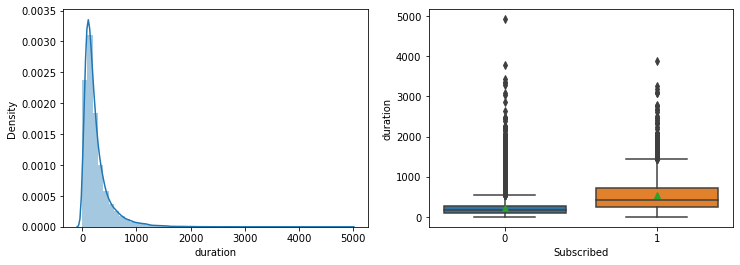

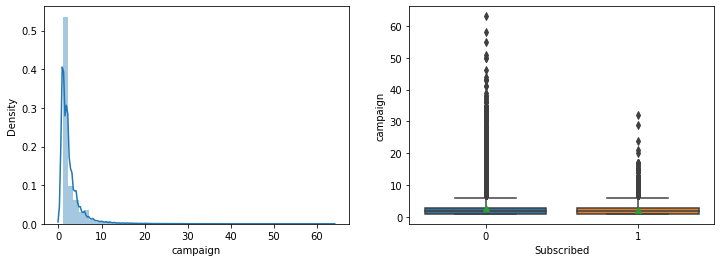

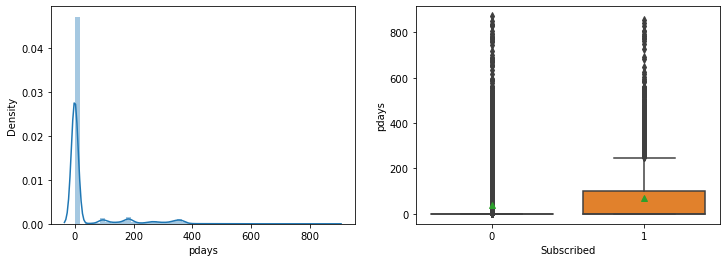

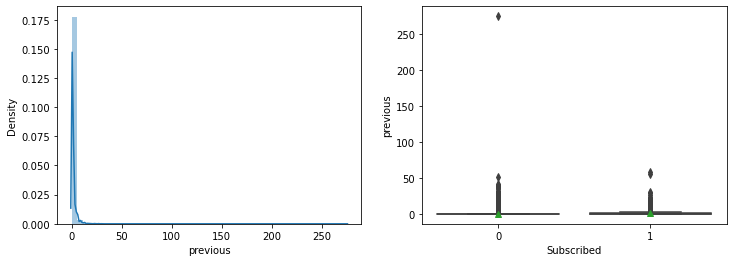

In [22]:
#creating distribution and box plots
for col in numerical_data : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='subscribed', y = col, data =df, showmeans = True)
    plt.xlabel('Subscribed')
    plt.ylabel(col)
    
    plt.show()

**Observation:** 
- From the Density and boxplot shown above we can say that the customerrs with longer call durations are more likely to subscribe for the term deposit
- Most of the customers who actually subscribed were contacted for the very first time
- Except for the column of age and days, all the other numerical features seems to be left skewed.

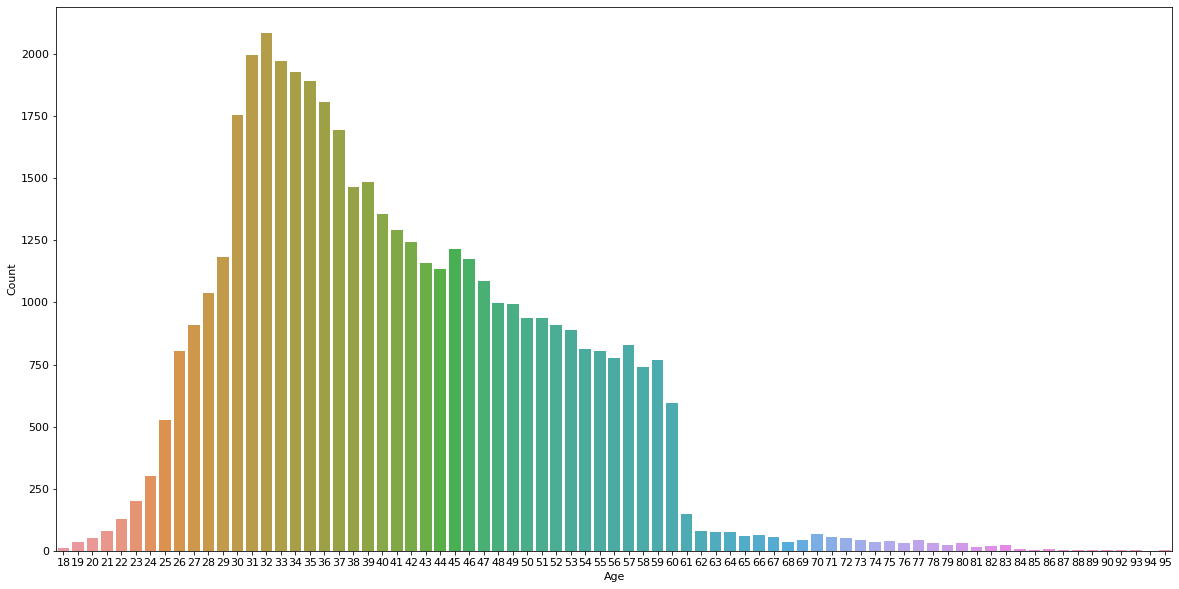

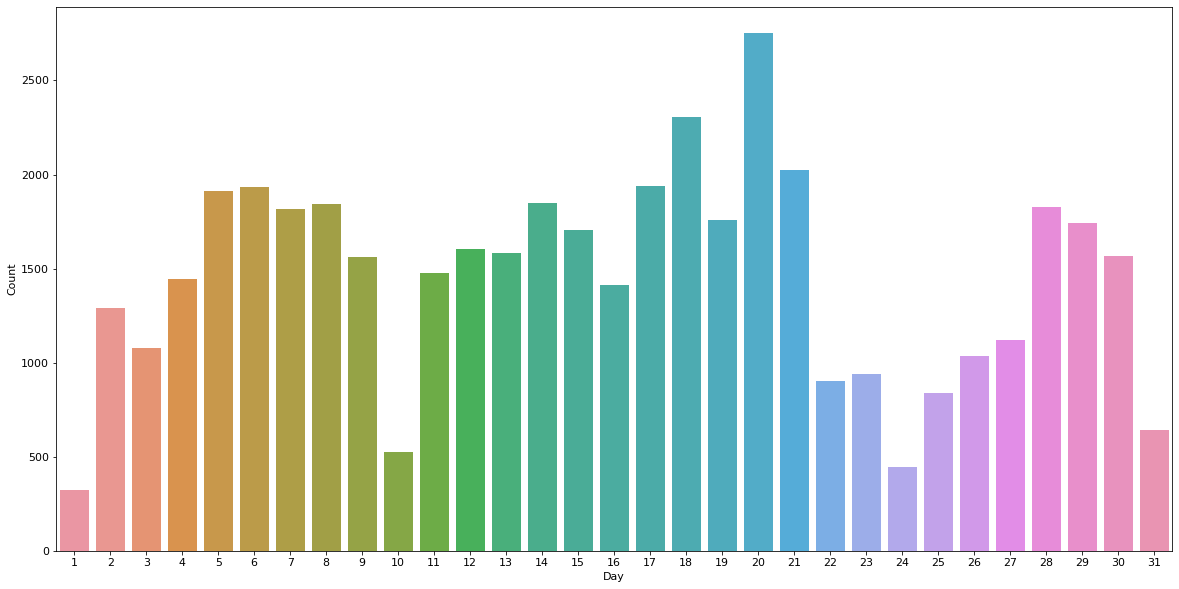

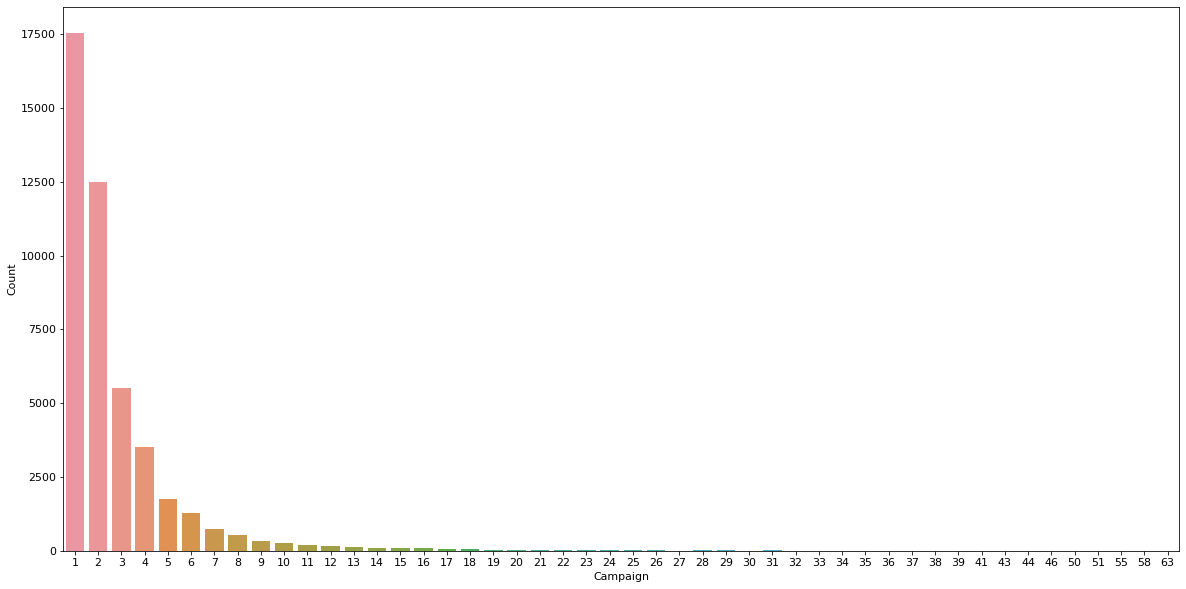

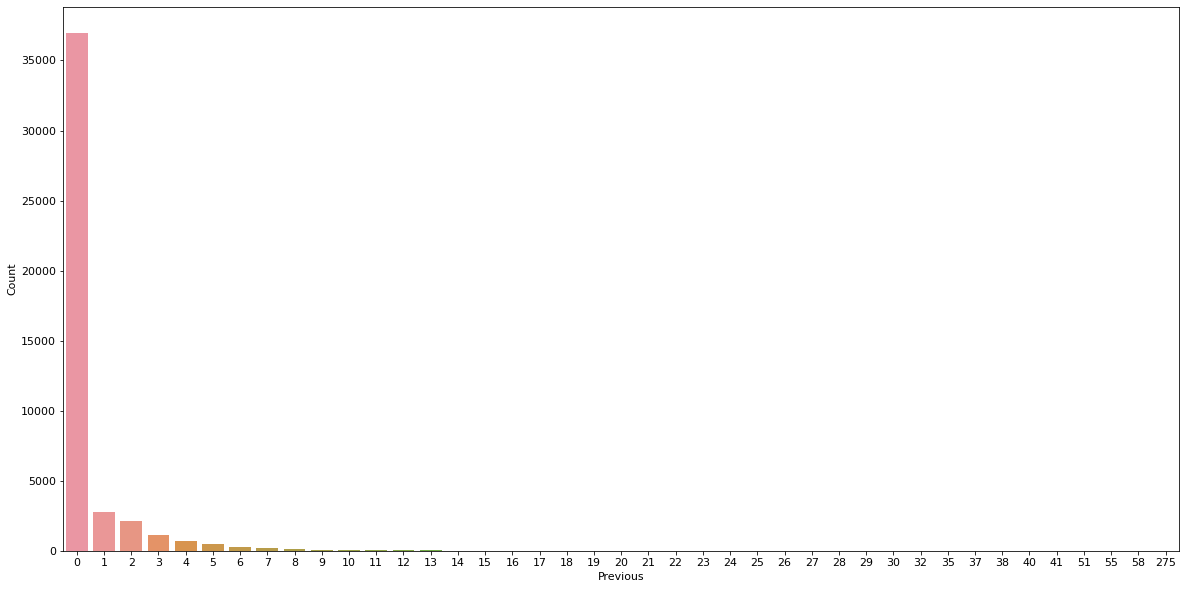

In [23]:
plt.rcParams.update({'font.size': 11})
for col in numerical_data : 
    if col not in ['balance', 'duration', 'pdays']:
        plt.figure(figsize=(20,10))
        plt.subplot().patch.set_visible(False)
        sns.countplot(x = df[col], data = df)
        plt.xlabel(col.title())
        plt.ylabel('Count')

        plt.show()

Balance, duration, pdays can be stored in bins

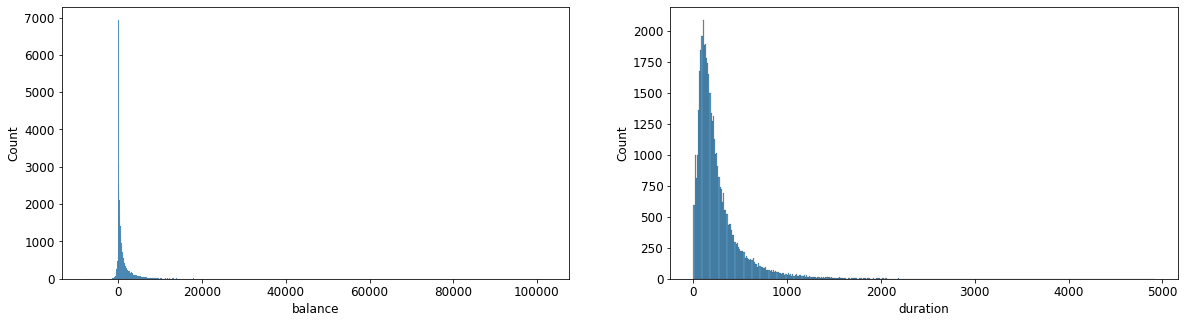

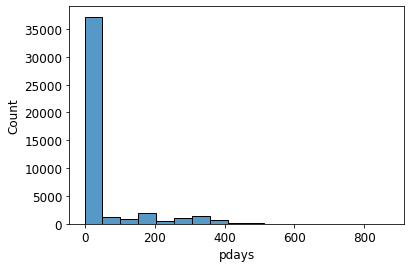

In [24]:
plt.subplots(figsize=(20,5)) 
plt.rcParams.update({'font.size': 12})
    
plt.subplot(1, 2, 1)
sns.histplot(x = df['balance'], data = df)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(x = df['duration'], data = df)
plt.ylabel('Count')
plt.show()

plt.subplot()
sns.histplot(x = df['pdays'], data = df)
plt.ylabel('Count')

plt.show()

**Observations**
- The maximum targeted age group is 30 to 37 Years old with more than 2000 people of age 32
- More than 2500 people were contacted on 20th day of the month
- more than 17500 customers were contacted only once during the campaign

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [25]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### Graphical Representation of Categorical Features

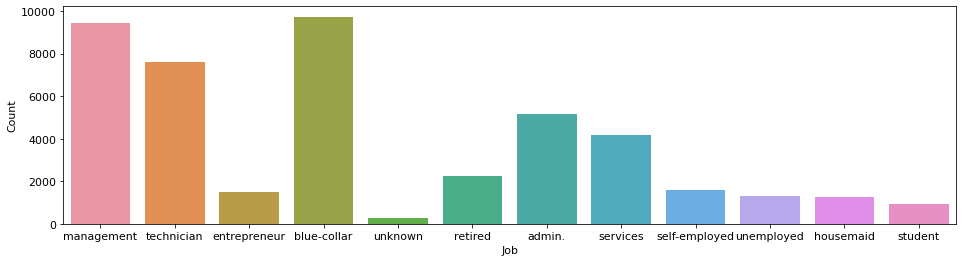

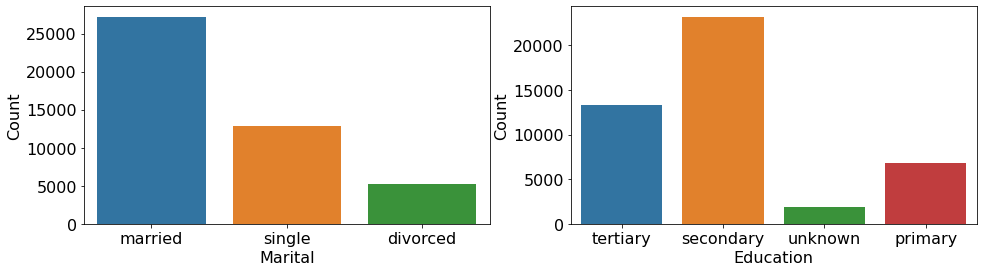

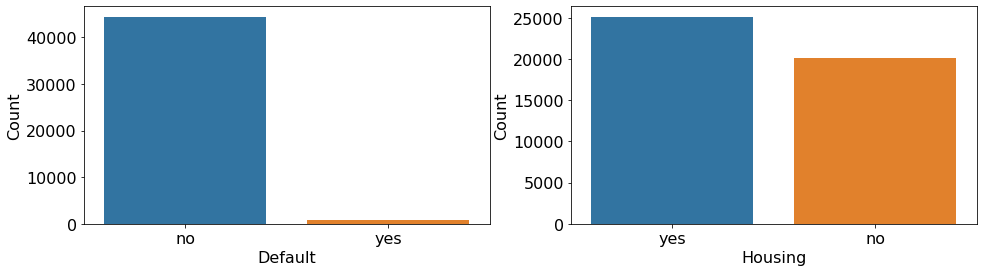

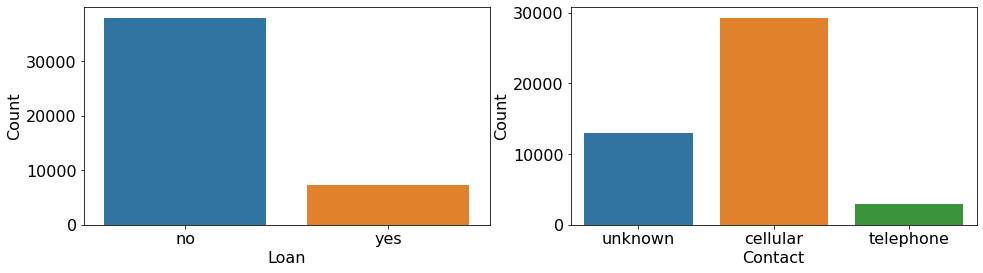

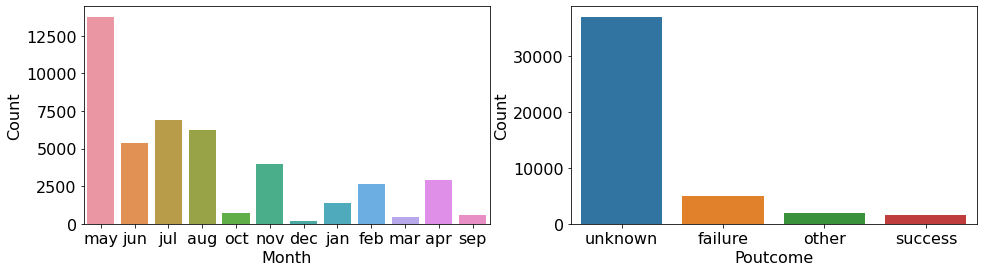

In [26]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
                 
    plt.subplot(1, 2, 2)
    column_name = object_data[col_index]
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    
    plt.show()

In [27]:
# frequency of particular value in a columns where 
for column in object_data:
    print(f'{df.groupby(column).size()}\n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

marital
divorced     5207
married     27214
single      12790
dtype: int64

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

default
no     44396
yes      815
dtype: int64

housing
no     20081
yes    25130
dtype: int64

loan
no     37967
yes     7244
dtype: int64

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64



**Observations**
- We can see the most of the targeted customers are either in management or are blue-coller (9000+ each)
- More than 25000 of the customers are married
- 20000+ customers have received secondary education
- 40000+ customers do not have any credit
- Around 25000+ have taken a housing loan
- 35000+ People do not have any kind of personal loan
- Around 30000+ people were contacted over cellular phones
- Most of the customers were contacted in the month of May
- Most of the people are being contacted for the very first time hence most of the values in the column poutcomee are unknown
- 5289 Out of 45211 contacted customers subscribed

**Let's see what value of each category have seen most of the subscriptions.**

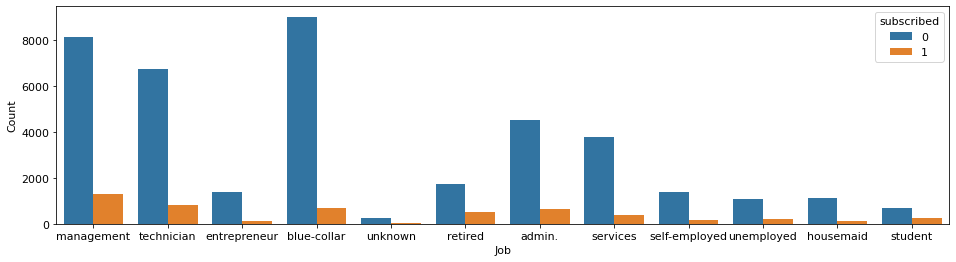

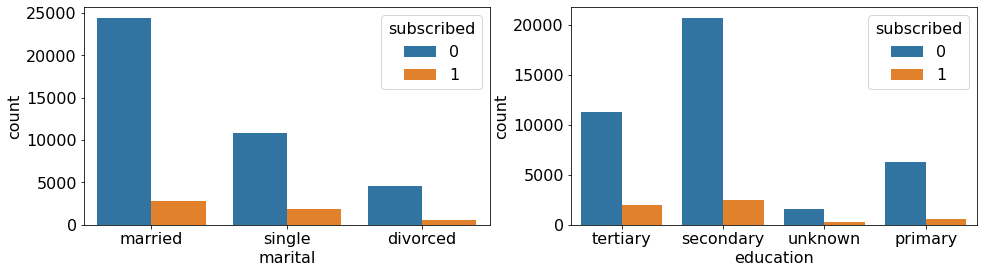

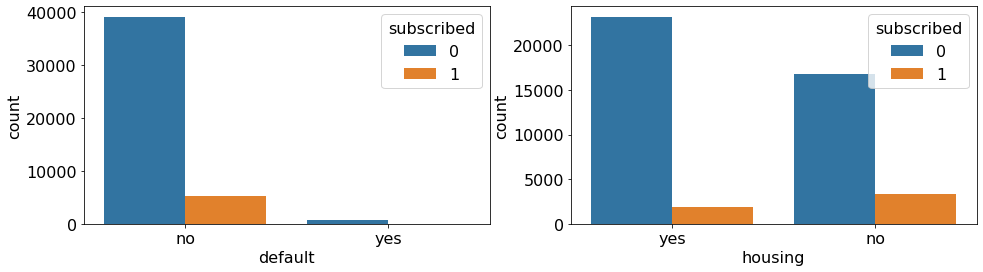

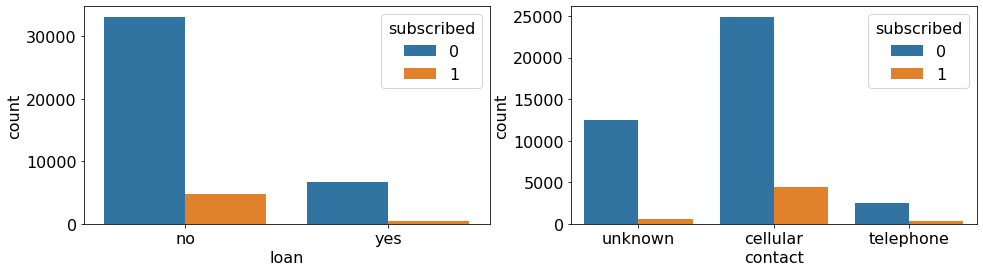

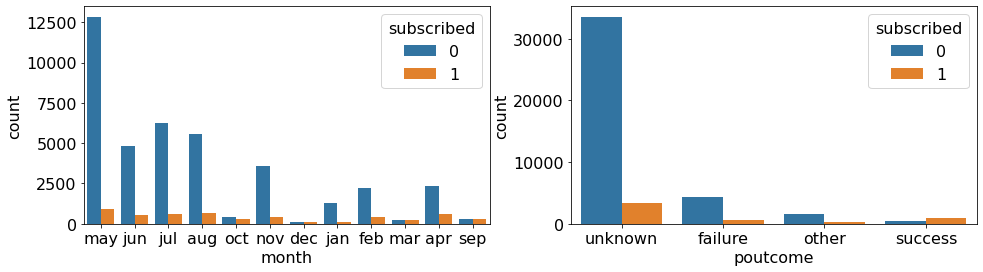

In [28]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], hue='subscribed', data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

# plt.show()

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
    column_name = object_data[col_index]
    plt.subplot(1, 2, 2).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
#     plt.show()

**Let's see the above information in tabular form.**

In [29]:
for col in object_data:
    print(df.groupby(['subscribed', col]).size())
    print()

subscribed  job          
0           admin.           4540
            blue-collar      9024
            entrepreneur     1364
            housemaid        1131
            management       8157
            retired          1748
            self-employed    1392
            services         3785
            student           669
            technician       6757
            unemployed       1101
            unknown           254
1           admin.            631
            blue-collar       708
            entrepreneur      123
            housemaid         109
            management       1301
            retired           516
            self-employed     187
            services          369
            student           269
            technician        840
            unemployed        202
            unknown            34
dtype: int64

subscribed  marital 
0           divorced     4585
            married     24459
            single      10878
1           divorced      622
   

**Obeservations**
- The customerrs in job category 'retired' have shown higher interest in the term deposit as compared to the others.
- Customers with a tertiary level of education were more like to subscribe for the term deposit.
- The people who do not have a credit have shown interest in the term deposit.
- The people who do not have a housing loan have shown relatively higher interest in the term deposit.
- Customers who were contacted during the month of March, September, December, and October repectively have mostly subscribed to the term deposit.

## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data.Here, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

### Labeled Encoding

We are performing the Labeled  encoding in which we will assign specific Numerical values to some caltegorical columns. We need to perform the Labeled encoding as We will need to have our feaures in Numericalbefore we try to run any Model with them or even if we want to find their correlation with other features.  
Here are the columns that We have chosen for Labeled  encoding:
- **education:** Education levels are comparable, So we can assign them the values 0, 1, 2, 3.
- **housing, loan and default:** Bivariate, We can use 0 and 1 to denote 'no' and 'yes' respectively.

In [30]:
# Replacing the values stored in 'education column' with their codes
df['education'].replace('unknown',0, inplace=True)
df['education'].replace('primary',1, inplace=True)
df['education'].replace('secondary',2, inplace=True)
df['education'].replace('tertiary',3, inplace=True)

# The column 'housing' and 'loan' are bivariate so we can replace them with 0s and 1s
for column in ['housing', 'loan', 'default']:
    df[column].replace('no',0, inplace=True)
    df[column].replace('yes',1, inplace=True)

- In the education column we have their the new numerical values on the basis of education levels.
- 'housing', 'loan' and 'default' are still bivariate only there data type is now int64.

In [31]:
df.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
age,1.000000,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
education,-0.173615,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.021661,0.002554,0.000194,0.007092,0.025295,0.051341
default,-0.017879,-0.009035,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.004307,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.021661,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.002554,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.000194,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.007092,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621


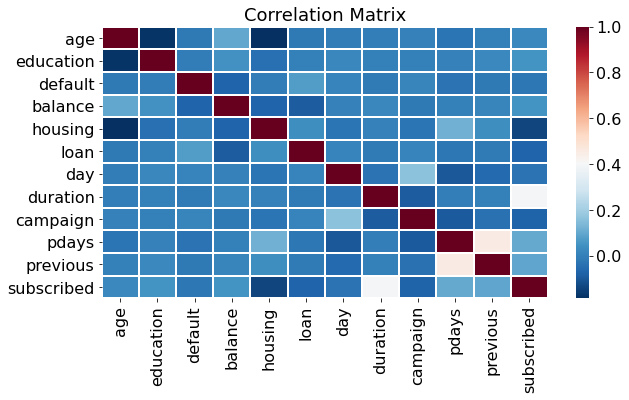

In [32]:
plt.subplots(figsize=(10,5)) 
sns.heatmap(df.corr(), cbar=True, cmap="RdBu_r", linewidths=1)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [33]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job', 'marital', 'contact', 'month', 'poutcome']

In [34]:
df.dtypes

age            int64
job           object
marital       object
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int32
dtype: object

In [35]:
# Check for missing values
df[object_data].isnull().sum()

job         0
marital     0
contact     0
month       0
poutcome    0
dtype: int64

In [36]:
encoded_df = df.copy()

In [37]:
encoded_col_names = []
for col in object_data:
    encoded_df[col] = df[col].astype('category')
    encoded_df[col+"_encoded"] = encoded_df[col].cat.codes
    encoded_col_names.append(col+"_encoded")
encoded_df.dtypes

age                    int64
job                 category
marital             category
education              int64
default                int64
balance                int64
housing                int64
loan                   int64
contact             category
day                    int64
month               category
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome            category
subscribed             int32
job_encoded             int8
marital_encoded         int8
contact_encoded         int8
month_encoded           int8
poutcome_encoded        int8
dtype: object

In [38]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,subscribed,job_encoded,marital_encoded,contact_encoded,month_encoded,poutcome_encoded
0,58,management,married,3,0,2143,1,0,unknown,5,...,1,-1,0,unknown,0,4,1,2,8,3
1,44,technician,single,2,0,29,1,0,unknown,5,...,1,-1,0,unknown,0,9,2,2,8,3
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,...,1,-1,0,unknown,0,2,1,2,8,3
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,...,1,-1,0,unknown,0,1,1,2,8,3
4,33,unknown,single,0,0,1,0,0,unknown,5,...,1,-1,0,unknown,0,11,2,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,0,825,0,0,cellular,17,...,3,-1,0,unknown,1,9,1,0,9,3
45207,71,retired,divorced,1,0,1729,0,0,cellular,17,...,2,-1,0,unknown,1,5,0,0,9,3
45208,72,retired,married,2,0,5715,0,0,cellular,17,...,5,184,3,success,1,5,1,0,9,2
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,...,4,-1,0,unknown,0,1,1,1,9,3


In [39]:
encoded_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed', 'job_encoded', 'marital_encoded',
       'contact_encoded', 'month_encoded', 'poutcome_encoded'],
      dtype='object')

In [40]:
encoded_df.drop(object_data, axis=1, inplace=True)
encoded_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'subscribed',
       'job_encoded', 'marital_encoded', 'contact_encoded', 'month_encoded',
       'poutcome_encoded'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

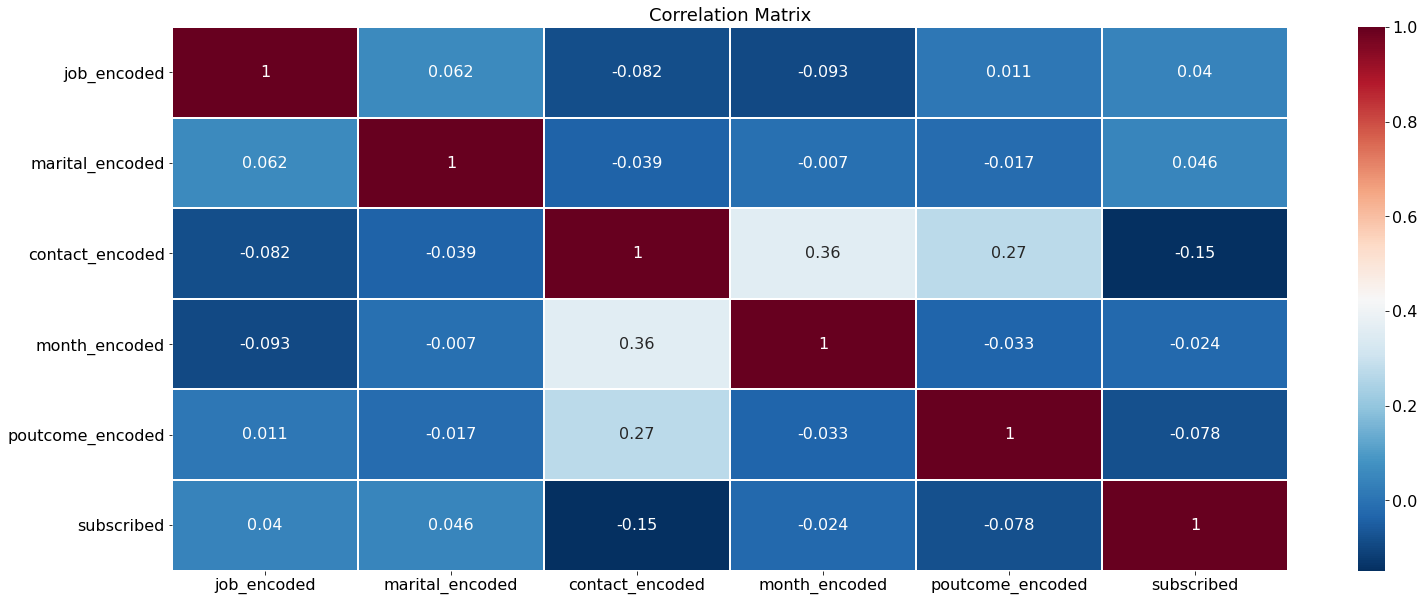

In [41]:
encoded_col_names.append('subscribed')

plt.subplots(figsize=(25,10)) 
sns.heatmap(encoded_df[encoded_col_names].corr(), cbar=True, cmap="RdBu_r",linewidths=1, annot=True)
plt.title("Correlation Matrix", fontsize=18)
# plt.show()

**Checking Non-Significant and redundant columns**
- Before deciding to drop any of the available columns We will  run a final check on the suspected columns.

In [42]:
#defaut feature does not play imp role
print(df.groupby(['default']).size())
print(df.groupby(['subscribed','default']).size())

default
0    44396
1      815
dtype: int64
subscribed  default
0           0          39159
            1            763
1           0           5237
            1             52
dtype: int64


- We are replacing the value '-1' in the column 'pdays' with 0 as the -1 is the most frequent value in the column and it can affect the calculations later.

In [43]:
df['pdays'].replace(-1,0, inplace=True)

In [44]:
df.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
age,1.000000,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.025155
education,-0.173615,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.021661,0.002554,0.000194,0.006975,0.025295,0.051341
default,-0.017879,-0.009035,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029927,-0.018329,-0.022419
balance,0.097783,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003330,0.016674,0.052838
housing,-0.185513,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124350,0.037076,-0.139173
loan,-0.015655,0.004307,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022709,-0.011043,-0.068185
day,-0.009120,0.021661,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.028348
duration,-0.004648,0.002554,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.394521
campaign,0.004760,0.000194,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.073172
pdays,-0.023841,0.006975,-0.029927,0.003330,0.124350,-0.022709,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.103323


In [45]:
print('10 most frequent values in the column "previous":')
print(df.groupby(['previous']).size()[:3])
print()
print("Data in 'previous' column compared to 'subscribed':")
print(df.groupby(['subscribed','previous']).size())
print()
print(df.groupby(['pdays']).size()[:3])
print(df.groupby(['subscribed','pdays']).size())


print(f"\nRows where 'pdays' is -1 and 'subscribe' is 1: {df[(df['pdays'] == -1) & (df['subscribed'] == 1)]['subscribed'].count()}")
print(f"Rows where 'previous' is 0 and 'subscribe' is 1: {df[(df['previous'] == 0) & (df['subscribed'] == 1)]['subscribed'].count()}")

10 most frequent values in the column "previous":
previous
0    36954
1     2772
2     2106
dtype: int64

Data in 'previous' column compared to 'subscribed':
subscribed  previous
0           0           33570
            1            2189
            2            1650
            3             848
            4             543
                        ...  
1           26              1
            29              1
            30              1
            55              1
            58              1
Length: 66, dtype: int64

pdays
0    36954
1       15
2       37
dtype: int64
subscribed  pdays
0           0        33570
            1            9
            2           35
            3            1
            4            1
                     ...  
1           804          1
            805          1
            828          1
            842          1
            854          1
Length: 914, dtype: int64

Rows where 'pdays' is -1 and 'subscribe' is 1: 0
Rows where 'previous' 

In [46]:
df.shape

(45211, 17)

### Dropping non-related columns
- **default:** It has 44369 'no' values. It denotes that 44369 out of 45211 customers do not have a credit in default.
- **contact:** This column can't contribute anymore in our prediction as the standard meddium of communication is 'cellular' now.
- **month and day:** We can drop these two columns as they aren't showing any significant correlation with our target variable.
- **previous:** Most frequent values in the columns 'previous' and 'pdays' are -1, and 0. Both these values have a frequency of 36954. Also the most frequent values are pointing towards the same  fact. We can drop 'previous' as the 'pdays' column has shown a higher correlation with target variable.
- **poutcome:** We will drop this column as it has 36959 'unknown' values, also it isn't showing any significant correlation with the target.

In [47]:
df.drop(['default', 'contact', 'month', 'day', 'previous', 'poutcome'], axis=1, inplace= True)

In [48]:
df.shape

(45211, 11)

In [49]:
print(f"Job Unknown: {df[df['job']=='unknown']['job'].count()}")
print(f"Education Unknown: {df[df['education']== 0]['education'].count()}")
print(f"Job and Education Unknown: {df[(df['job']=='unknown') & (df['education']== 0)]['education'].count()}")
print(f"Job or Education Unknown:{df[(df['job']=='unknown') | (df['education']== 0)]['education'].count()}")

Job Unknown: 288
Education Unknown: 1857
Job and Education Unknown: 127
Job or Education Unknown:2018


### Dropping rows with unknown values
- We are dropping the rows with 'unknown' as entry from the education and job column. Column 'education' has 1857, and 'job' has 288 unknown values.
- A total of 127 rows have 'unknown' entry in both the education and job column.
- Dropping these entries will removes a total of 2018 values from our dataframe.

In [50]:
df.drop(df[df['job']=='unknown'].index, inplace=True)
# in the education column we have asssigned the value 0 to 'unknown'
df.drop(df[df['education']==0].index, inplace=True)

In [51]:
df.shape

(43193, 11)

In [52]:
# Checking calls with duration 0
df[(df['duration']==0)]['duration'].count()

3

In [53]:
# Checking if any customer with cal duration 0 has subscribed for the term deposit
df[(df['duration']==0) & (df['subscribed']) == 1]['duration'].count()

0

- As expected, none of the customers with call duration 0 subscribed for the term deposit.  
Hence we can drop these entries.

In [54]:
df.drop(df[df['duration']==0].index, inplace=True)
df.shape

(43190, 11)

In [55]:
# Updating Object data list
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job', 'marital']

### **Removing outliers**

In [56]:
def remove_outliers(data, column , minimum, maximum):
    col_values = data[column].values
    data[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return data

In [57]:
min_val = df["duration"].min()
max_val = 1500
df = remove_outliers(data=df, column='duration' , minimum=min_val, maximum=max_val)

min_val = df["age"].min()
max_val = 80
df = remove_outliers(data=df, column='age' , minimum=min_val, maximum=max_val)

min_val = df["campaign"].min()
max_val = 6

df = remove_outliers(data=df, column='campaign' , minimum=min_val, maximum=max_val)

### One-Hot Encoding

In [58]:
#with one hot encoding
df_ohe = df.copy()
obj_data_ohe = pd.get_dummies(df_ohe[object_data],drop_first = False)
obj_data_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [59]:
obj_data_ohe.keys()

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single'],
      dtype='object')

In [60]:
obj_data_ohe.shape

(43190, 14)

In [61]:
df_ohe = pd.concat([df_ohe, obj_data_ohe], axis=1)
df_ohe.drop('subscribed', axis=1, inplace=True)
df_ohe['subscribed'] = df['subscribed']

In [62]:
df_ohe.keys()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'subscribed'],
      dtype='object')

In [63]:
# Dropping object data from dataframe df_ohe, as we are going to use the encoded columns
df_ohe.drop(object_data, axis=1, inplace=True)

In [64]:
df_ohe.keys()

Index(['age', 'education', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'subscribed'],
      dtype='object')

In [65]:
df_ohe.shape

(43190, 23)

### Summary of Feature engneering

In [66]:
print('Total number of features:', len(df_ohe.keys()))
print('Numerical Features:',len(df_ohe.keys()) - len(obj_data_ohe.keys()))
print('Encoded Categorical Features:', len(obj_data_ohe.keys()))

Total number of features: 23
Numerical Features: 9
Encoded Categorical Features: 14


In [67]:
# Checking for any null values
df_ohe.isnull().sum().sort_values(ascending = False)

subscribed           0
job_entrepreneur     0
education            0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
job_admin.           0
job_blue-collar      0
job_housemaid        0
marital_single       0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
marital_divorced     0
marital_married      0
age                  0
dtype: int64

In [68]:
# Copying data to a new dataframe, which includes the columns of interest.
df_model = df_ohe.copy()

print("Columns of our interest:")

for col in df_model:
    print(f'\t\t\t{col}')

Columns of our interest:
			age
			education
			balance
			housing
			loan
			duration
			campaign
			pdays
			job_admin.
			job_blue-collar
			job_entrepreneur
			job_housemaid
			job_management
			job_retired
			job_self-employed
			job_services
			job_student
			job_technician
			job_unemployed
			marital_divorced
			marital_married
			marital_single
			subscribed


<AxesSubplot:xlabel='subscribed', ylabel='count'>

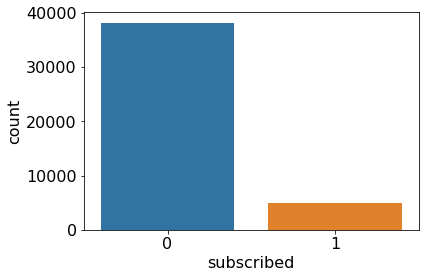

In [69]:
sns.countplot(x=df_model['subscribed'], data=df_ohe)

In [70]:
df_model.shape

(43190, 23)

In [71]:
df_model_yes = df_model[df_model['subscribed']==1]
for _ in range(6):
    df_model = pd.concat([df_model,df_model_yes])

<AxesSubplot:xlabel='subscribed', ylabel='count'>

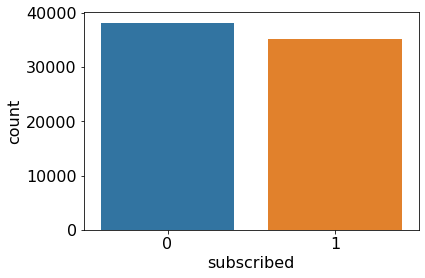

In [72]:
sns.countplot(x=df_model['subscribed'], data=df_ohe)

In [73]:
df_model.shape

(73316, 23)

In [74]:
df_model[list(df_model.columns)[:12]].head()

,age,education,balance,housing,loan,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid
0,58.0,3,2143,1,0,261.0,1.0,0,0,0,0,0
1,44.0,2,29,1,0,151.0,1.0,0,0,0,0,0
2,33.0,2,2,1,1,76.0,1.0,0,0,0,1,0
5,35.0,3,231,1,0,139.0,1.0,0,0,0,0,0
6,28.0,3,447,1,1,217.0,1.0,0,0,0,0,0


In [75]:
df_model[list(df_model.columns)[12:]].head()

,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,subscribed
0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,1,0


In [103]:
df_model.to_csv('model.csv', index=False)

### Testing Models

In [76]:
from time import time

aucs = []
names = []
rocs = []

def get_report(name, classifier, x_train, y_train, y_test, y_pred):
    names.append(name)
    s_time = time()
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    
    report = ''
    
    report += f'Report for {classifier}\n'
    
    report += f'{classifier} Confusion  matrix:\n'
    report += f'{confusion_matrix(y_test, y_pred)}\n\n'
    report += f'{classifier} accuracy mean: {accuracies.mean()}\n'
    report += f'{classifier} accuracy std dev: {accuracies.std()}\n'
    report += f'{classifier} preciosn score: {precision_score(y_test, y_pred)}\n'
    report += f'{classifier} recall score: {recall_score(y_test, y_pred)}\n'
    report += f'{classifier} f1 score: {f1_score(y_test, y_pred)}\n'
    auc = roc_auc_score(y_test, y_pred)
    report += f'{classifier} AUC: {auc}\n'
    
    rocs.append(roc_curve(y_test, y_pred))
    aucs.append(auc)
    
    report += f'\nClassification report: \n{classification_report(y_test, y_pred)}'
    report += f'\nTime taken: {time() - s_time}\n'
    report += '*'*50
    
    return report

In [77]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [78]:
x = df_model.drop('subscribed',axis = 1).values
y = df_model['subscribed'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
models = {'LR': LogisticRegression(), 'KNN': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2),
         'GaussNB': GaussianNB(), 'DTree': DecisionTreeClassifier(criterion = 'entropy'),
         'RFC': RandomForestClassifier(n_estimators = 10, criterion = 'entropy'), 
        'GBC': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3),
         'ABC': AdaBoostClassifier()}

log = ''

for name, classifier in models.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = get_report(name, classifier, x_train, y_train, y_test, y_pred)
    print(report)
    log += report
    log += '\n'

Report for LogisticRegression()
LogisticRegression() Confusion  matrix:
[[7856 1719]
 [2211 6543]]

LogisticRegression() accuracy mean: 0.7826578178075436
LogisticRegression() accuracy std dev: 0.006544210822735868
LogisticRegression() preciosn score: 0.7919389978213508
LogisticRegression() recall score: 0.747429746401645
LogisticRegression() f1 score: 0.7690409026798307
LogisticRegression() AUC: 0.7839498601459921

Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      9575
           1       0.79      0.75      0.77      8754

    accuracy                           0.79     18329
   macro avg       0.79      0.78      0.78     18329
weighted avg       0.79      0.79      0.79     18329

Time taken: 0.7005250453948975
**************************************************
Report for KNeighborsClassifier()
KNeighborsClassifier() Confusion  matrix:
[[7572 2003]
 [ 139 8615]]

KNeighborsClassifier() accuracy mean: 0.871

In [80]:
with open('logs\log_report.log', 'w') as writer:
        writer.write(log)

In [81]:
df_result = pd.DataFrame({'Classifier': names, 'Results': aucs})

In [83]:
df_result

,Classifier,Results
0,LR,0.783950
1,KNN,0.887465
2,GaussNB,0.708726
3,DTree,0.949399
4,RFC,0.966736
5,GBC,0.845301
6,ABC,0.807079


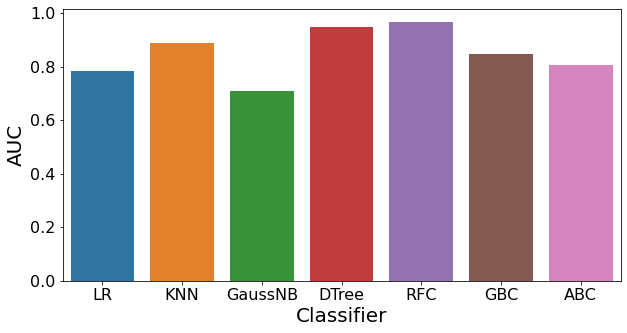

In [85]:
plt.subplots(figsize=(10,5)) 


ax = sns.barplot(x=df_result["Classifier"], y=df_result["Results"], data=df_result)

ax.set_xlabel('Classifier',fontsize = 20)
ax.set_ylabel('AUC', fontsize = 20)
plt.show()

## Finalizing the Model
- From the output above We have observed that **Random Forest Classifier** has performed consistently well for all the previous scenarios.
- **Random Forest Classifier** is giving us an *accuracy mean, and an AUC of 0.96.*

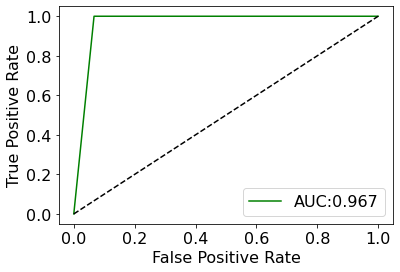

In [100]:
from sklearn.metrics import roc_curve 

false_pr_test, true_pr_test, thresholds_test = rocs[4]

auc_test = aucs[4]

plt.plot(false_pr_test, true_pr_test, 'g-',label ='AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()